# **Módulo 46 - Introducción a las Series de Tiempo**

En este módulo, nos adentraremos en el fascinante mundo de las series de tiempo, con un enfoque especial en el análisis y visualización de datos financieros. Aprenderemos a manejar y analizar conjuntos de datos ordenados cronológicamente, esenciales para comprender el comportamiento del mercado de valores.

- **Componentes de una Serie Temporal**

Exploraremos los elementos fundamentales de una serie tempora, como la tendencia, estacionalidad, ciclos y ruido. Comprenderemos cómo estos componentes afectan el análisis de datos y cómo identificar patrones subyacentes.

- **Visualización de Datos Financieros**

Aprenderemos a utilizar técnicas avanzadas de visualización, como gráficos OHLC y velas japonesas, para analizar el sentimiento del mercado y predecir cambios de precios. Estas herramientas nos permitirán representar detalladamente las fluctuaciones diarias de precios.

- **Predicción con Medias Móviles**

Introduciremos la técnica de predicción mediante medias móviles, que utiliza promedios de datos pasados para prever valores futuros. Evaluaremos la precisión de nuestras predicciones utilizando métricas como RMSE y MAPE.

____
# **Series de Tiempo**

Una serie de tiempo es un conjunto de puntos ordenados con relación al tiempo.

Los puntos de una serie de tiempo están ordenados en unidades equidistantes de tiempo. Por ejemplo, una serie diaria de precios, un conjunto mensual de tasas de préstamo.

Las series de tiempo se visualizan con una gráfica llamada de la misma forma, que no es más que una gráfica de líneas donde el eje 'X' corresponde al eje temporal.

## **Componentes de una Serie de Tiempo**

- **Tendencia** - Componente de base que indica si la serie es ascendente o descendiente. Es un componente de largo plazo, menos abrupto en su movimiento.

- **Estacionalidad** - Ciclos repetitivos en la serie, identificados por patrones en su comportamiento. Por ejemplo, altas ventas en mayo, diciembre.

- **Componente Cíclico** - Es la parte de lse serie de tiempo que puede ser explicada por movimientos cíclicos en otras variables de base (sistemáticas), como la economía.

- **Ruido** - Variación aleatoria en la serie de tiempo. No puede ser explicada por movimientos de base o patrones.

- **Residuo** - Usado en procesos de *fit* de series de tiempo, el residuo es lo que queda al final del proceso. Es la diferencia entre la predicción y lo observado.

- **Nivel** - El valor promedio de una serie de tiempo.
____

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [4]:
df = pd.read_csv(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\52_Módulo_46_Series_de_Tiempo\Modulo_46_Series_de_Tiempo\Analista de datos AAPL_2006-01-01_to_2018-01-01_M30.csv', 
                 index_col='Date', parse_dates=['Date'])

df.sample(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2011-02-16,51.54,52.13,51.50,51.88,120288833,AAPL
2013-01-18,71.22,71.75,70.91,71.43,118287267,AAPL
2016-06-16,96.45,97.75,96.07,97.55,31326815,AAPL
2016-10-25,117.95,118.36,117.31,118.25,48128970,AAPL
2012-09-25,98.32,98.97,96.14,96.22,129690449,AAPL


In [5]:
df.head(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
2006-01-10,10.89,11.70,10.83,11.55,570088246,AAPL
2006-01-11,11.98,12.11,11.80,11.99,373548882,AAPL
2006-01-12,12.14,12.34,11.95,12.04,320201966,AAPL
2006-01-13,12.14,12.29,12.09,12.23,194153393,AAPL


In [6]:
df.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL
2017-12-29,170.52,170.59,169.22,169.23,25999922,AAPL


_____
# **Análisis Univariado** 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [8]:
df.nunique()

Open      2630
High      2579
Low       2575
Close     2579
Volume    3019
Name         1
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.0,6.467331e+01,4.452493e+01,7.39,2.342500e+01,5.786000e+01,9.916500e+01,1.751100e+02
High,3019.0,6.525683e+01,4.481177e+01,7.56,2.380500e+01,5.846000e+01,1.002750e+02,1.772000e+02
Low,3019.0,6.403344e+01,4.423083e+01,7.17,2.301500e+01,5.732000e+01,9.838500e+01,1.748600e+02
Close,3019.0,6.466289e+01,4.453645e+01,7.24,2.342000e+01,5.792000e+01,9.948000e+01,1.764200e+02
Volume,3019.0,1.311457e+08,1.018560e+08,11475922.00,5.292889e+07,1.066271e+08,1.798977e+08,8.432640e+08


In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.00,64.67,44.52,7.39,23.43,57.86,99.16,175.11
High,3019.00,65.26,44.81,7.56,23.80,58.46,100.28,177.20
Low,3019.00,64.03,44.23,7.17,23.02,57.32,98.39,174.86
Close,3019.00,64.66,44.54,7.24,23.42,57.92,99.48,176.42
Volume,3019.00,131145687.66,101855966.22,11475922.00,52928887.00,106627080.00,179897651.50,843264044.00


In [17]:
df[df==0].count() / df.count()

Open     0.00
High     0.00
Low      0.00
Close    0.00
Volume   0.00
Name     0.00
dtype: float64

In [18]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [19]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [22]:
df.shape

(3019, 6)

In [28]:
columnas = df.columns

for i in columnas:
    print(i)
    print(' ')
    print(df[i].unique())

Open
 
[ 10.34  10.73  10.69 ... 170.1  171.   170.52]
High
 
[ 10.68  10.85  10.7  ... 170.78 171.85 170.59]
Low
 
[ 10.32  10.64  10.54 ... 169.71 170.48 169.22]
Close
 
[ 10.68  10.71  10.63 ... 170.6  171.08 169.23]
Volume
 
[201853036 155225609 112396081 ...  21498213  16480187  25999922]
Name
 
['AAPL']


_______

# **Visualización de Series de Tiempo**

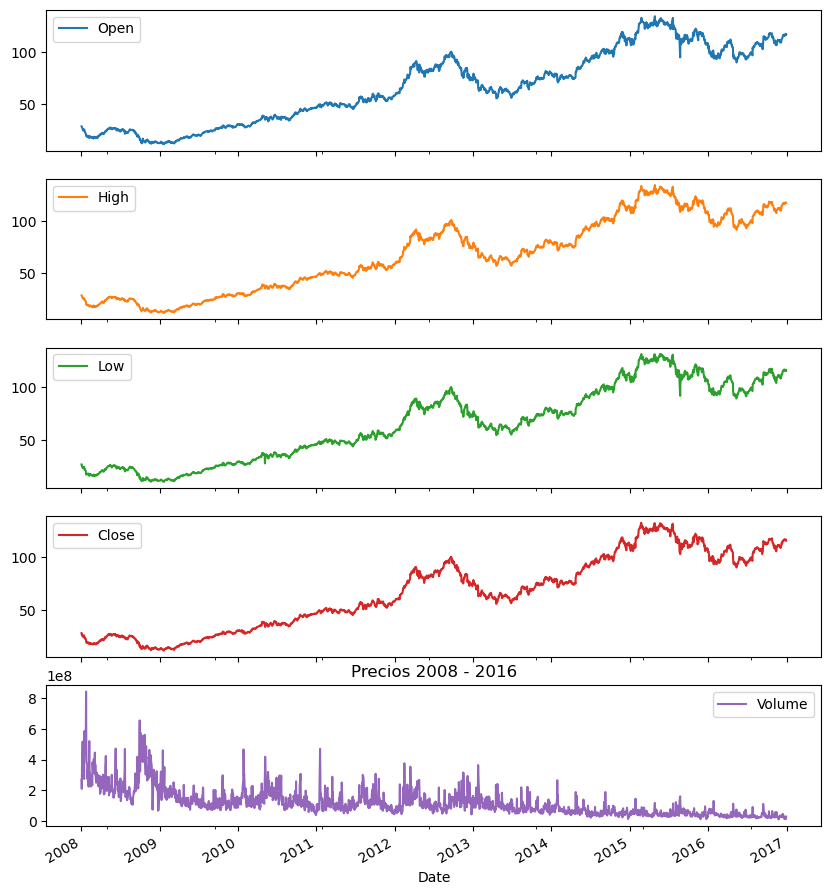

In [30]:
df['2008':'2016'].plot(subplots= True, figsize=(10,12))
plt.title('Precios 2008 - 2016')
plt.show()

In [31]:
df['Name'].unique()

array(['AAPL'], dtype=object)

# **Visualización de lags**

- Útil para ver cambios de tendencias de la misma.

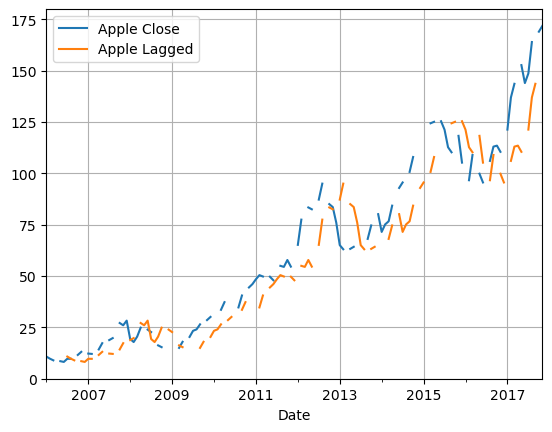

In [34]:
df['Close'].asfreq('M').plot(legend=True)
lag = 6
shifted = df['Close'].asfreq('M').shift(lag).plot(legend=True)
shifted.legend(['Apple Close', 'Apple Lagged'])
plt.grid()
plt.show()

In [35]:
df['Change'] = df.Close.div(df.Close.shift())

In [36]:
pd.set_option('display.float_format', lambda x: '%4f' % x)

In [37]:
df.head(3)

,Open,High,Low,Close,Volume,Name,Change
Date,,,,,,,
2006-01-03,10.340000,10.680000,10.320000,10.680000,201853036,AAPL,NaN
2006-01-04,10.730000,10.850000,10.640000,10.710000,155225609,AAPL,1.002809
2006-01-05,10.690000,10.700000,10.540000,10.630000,112396081,AAPL,0.992530


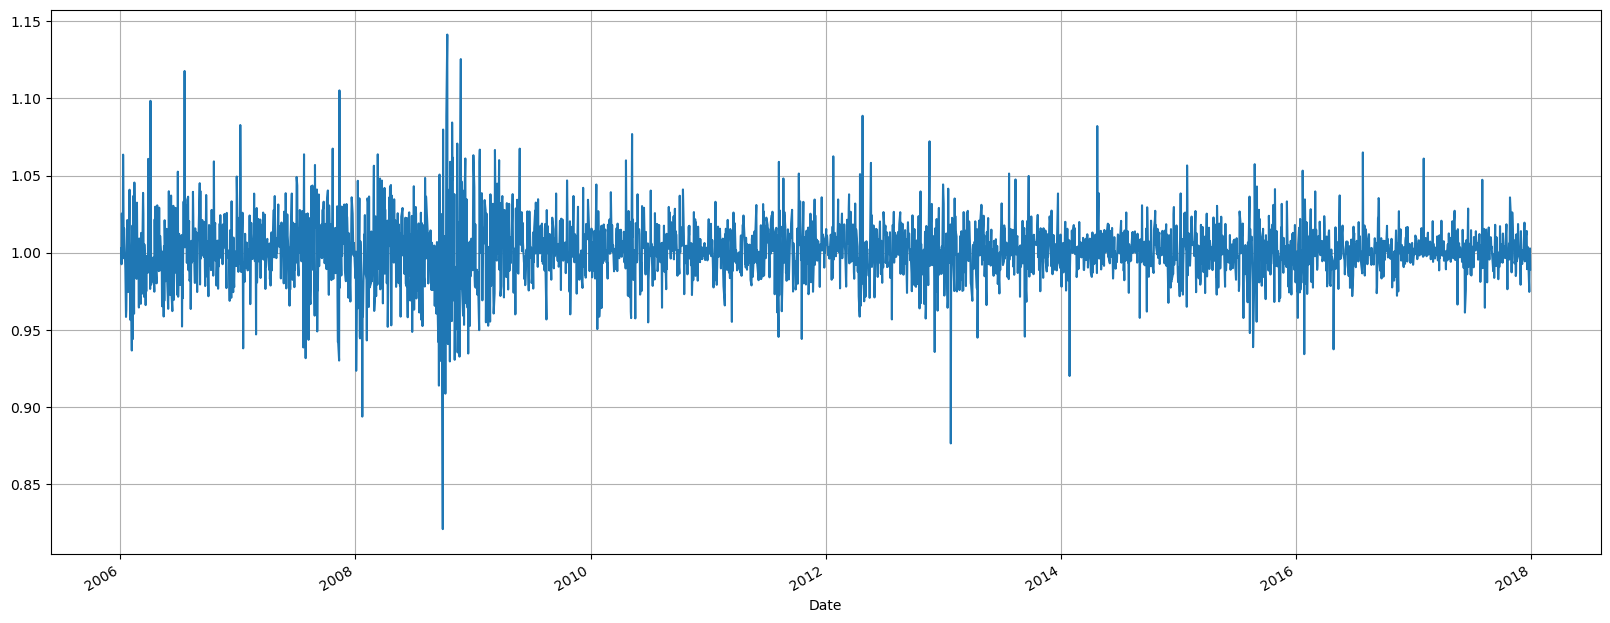

In [38]:
df['Change'].plot(figsize=(20,8)).grid()

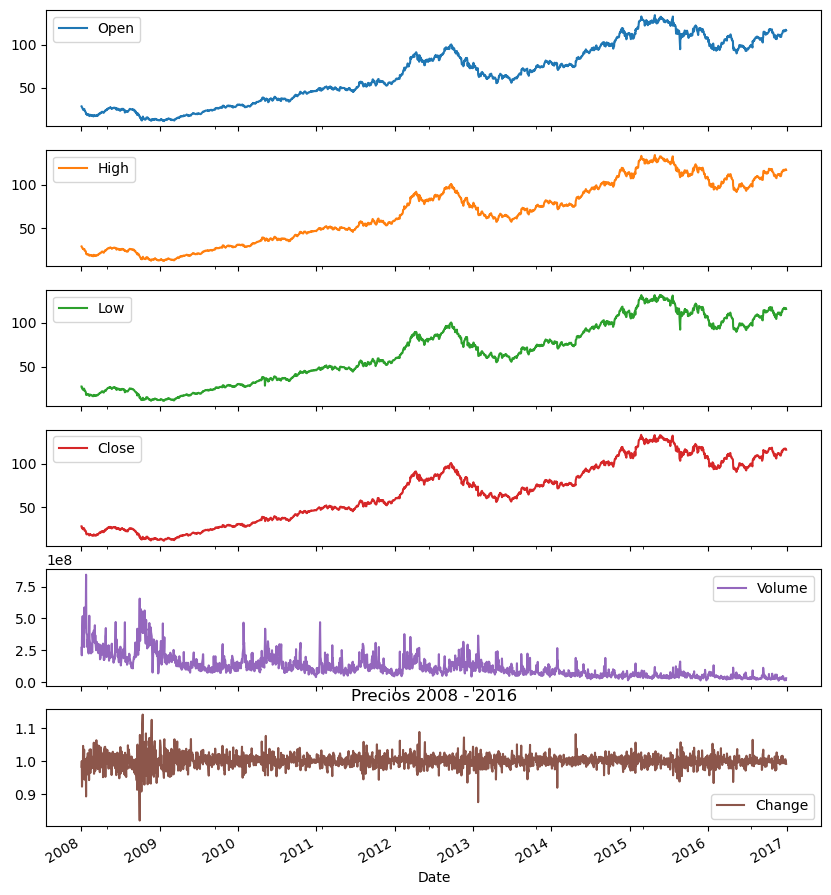

In [39]:
df['2008':'2016'].plot(subplots= True, figsize=(10,12))
plt.title('Precios 2008 - 2016')
plt.show()

In [40]:
df['Return'] = df.Change.sub(1).mul(100)

In [41]:
df.head(3)

,Open,High,Low,Close,Volume,Name,Change,Return
Date,,,,,,,,
2006-01-03,10.340000,10.680000,10.320000,10.680000,201853036,AAPL,NaN,NaN
2006-01-04,10.730000,10.850000,10.640000,10.710000,155225609,AAPL,1.002809,0.280899
2006-01-05,10.690000,10.700000,10.540000,10.630000,112396081,AAPL,0.992530,-0.746965


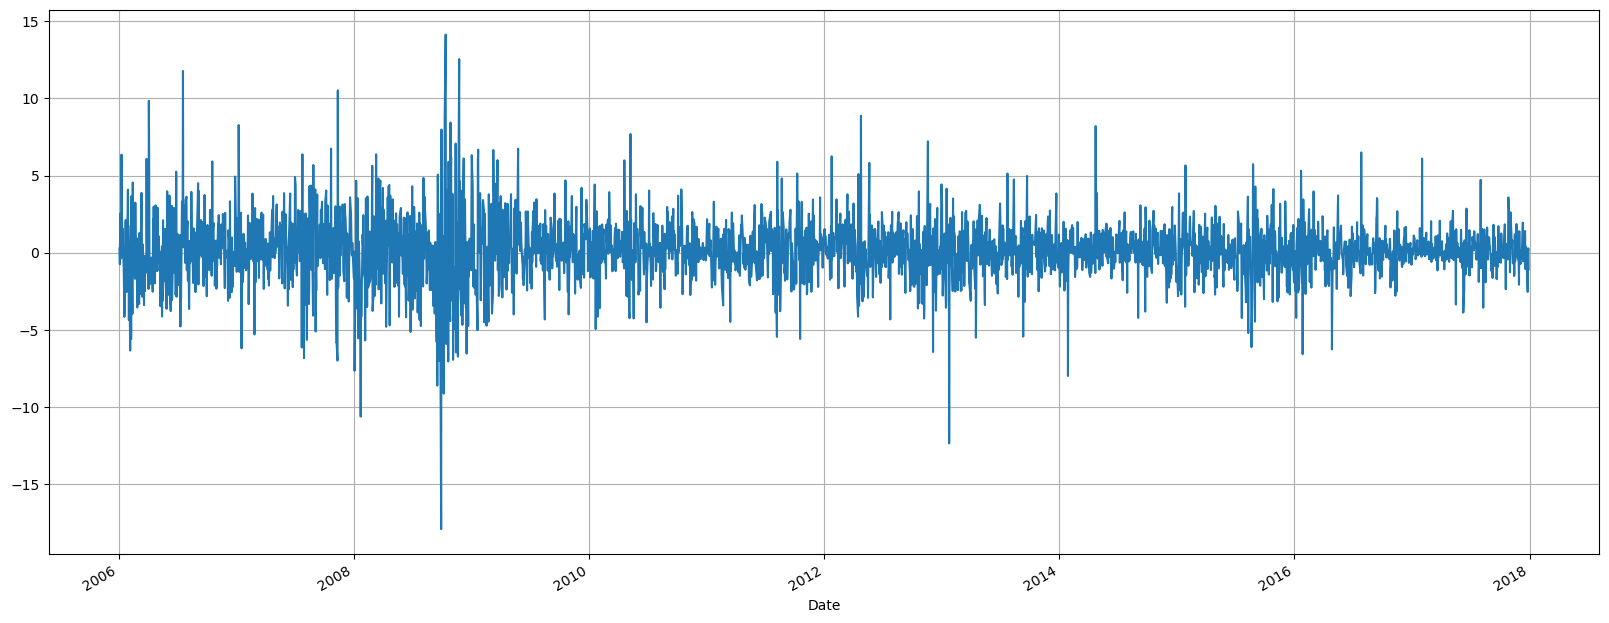

In [42]:
df['Return'].plot(figsize=(20,8)).grid()

# **Compración de Dos Series**

In [43]:
df_apple = df

In [44]:
df_google = pd.read_csv(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\52_Módulo_46_Series_de_Tiempo\Modulo_46_Series_de_Tiempo\Analista de datos GOOGL_2006-01-01_to_2018-01-01_M31.csv',
                        index_col='Date', parse_dates=['Date'])

In [45]:
df_google.head(3)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.470000,218.050000,209.320000,217.830000,13137450,GOOGL
2006-01-04,222.170000,224.700000,220.090000,222.840000,15292353,GOOGL
2006-01-05,223.220000,226.000000,220.970000,225.850000,10815661,GOOGL


In [46]:
pd.set_option('display.float_format', lambda x: '%4f' % x)

In [49]:
df_google.head(3)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.470000,218.050000,209.320000,217.830000,13137450,GOOGL
2006-01-04,222.170000,224.700000,220.090000,222.840000,15292353,GOOGL
2006-01-05,223.220000,226.000000,220.970000,225.850000,10815661,GOOGL


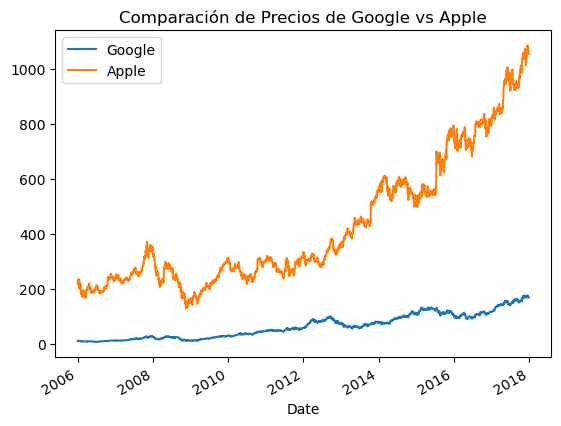

In [50]:
df_apple.Close.plot()
df_google.Close.plot()
plt.legend(['Google', 'Apple'])
plt.title('Comparación de Precios de Google vs Apple')
plt.show()